Model Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



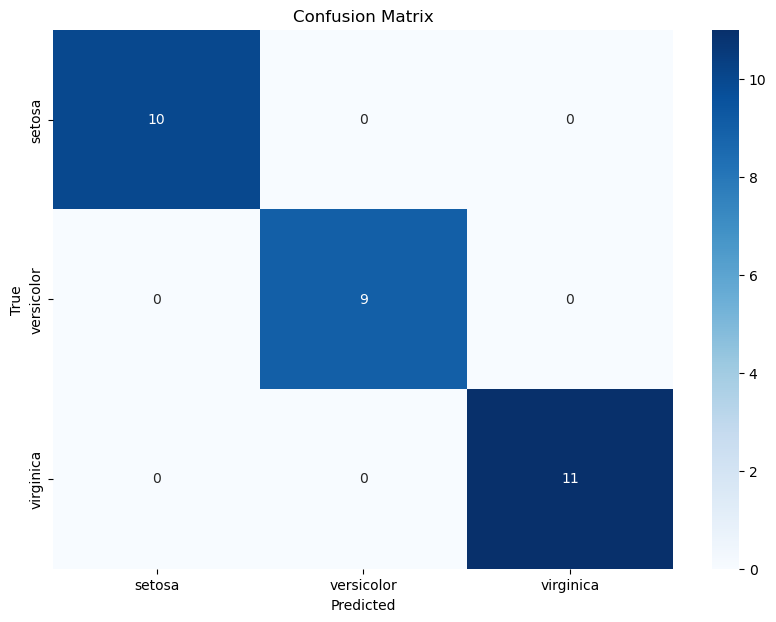

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Score: 0.9667


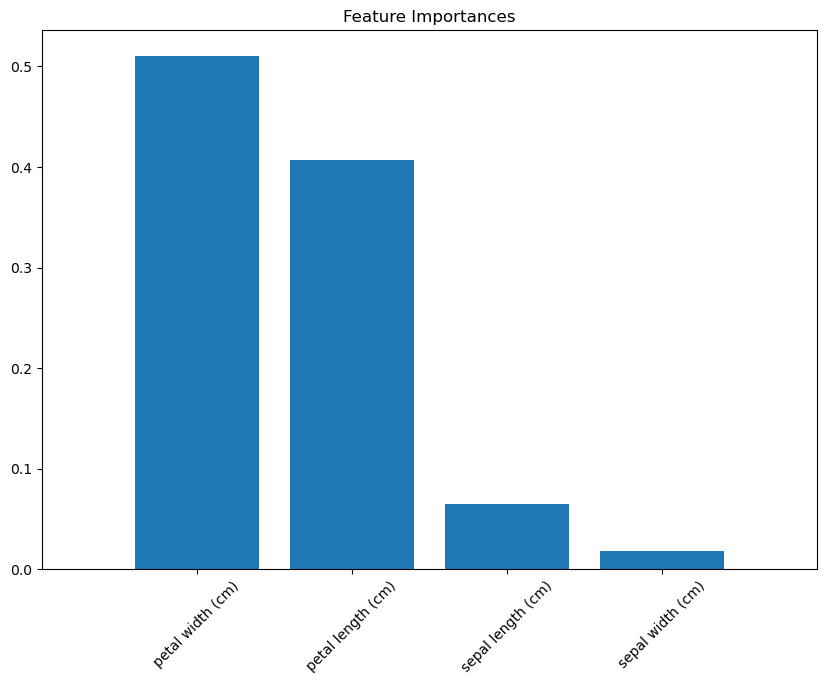

In [2]:
# Model Scoring and Evaluation

import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Load model
model = joblib.load('model.pkl')

# Load test data
X_test = pd.read_csv('../data/X_test.csv').values
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

# Predict
predictions = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Cross-Validation
model = RandomForestClassifier()  # Reinitialize to ensure a fresh model
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores):.4f}")

# Feature Importance
model.fit(X, y)  # Refit on the full dataset
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()
